In [1]:
%matplotlib inline
from typing import Sequence

import kornia
import torch
from kornia.feature import DISK
from kornia.feature.disk import DISKFeatures
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('img/prague.png')
timg = kornia.utils.image_to_tensor(np.array(img), keepdim=False).float() / 255.

In [2]:
disk: DISK = DISK.from_pretrained(checkpoint='depth', device='cpu')
with torch.no_grad():
    features: Sequence[DISKFeatures] = disk.detect(timg, n=2000)

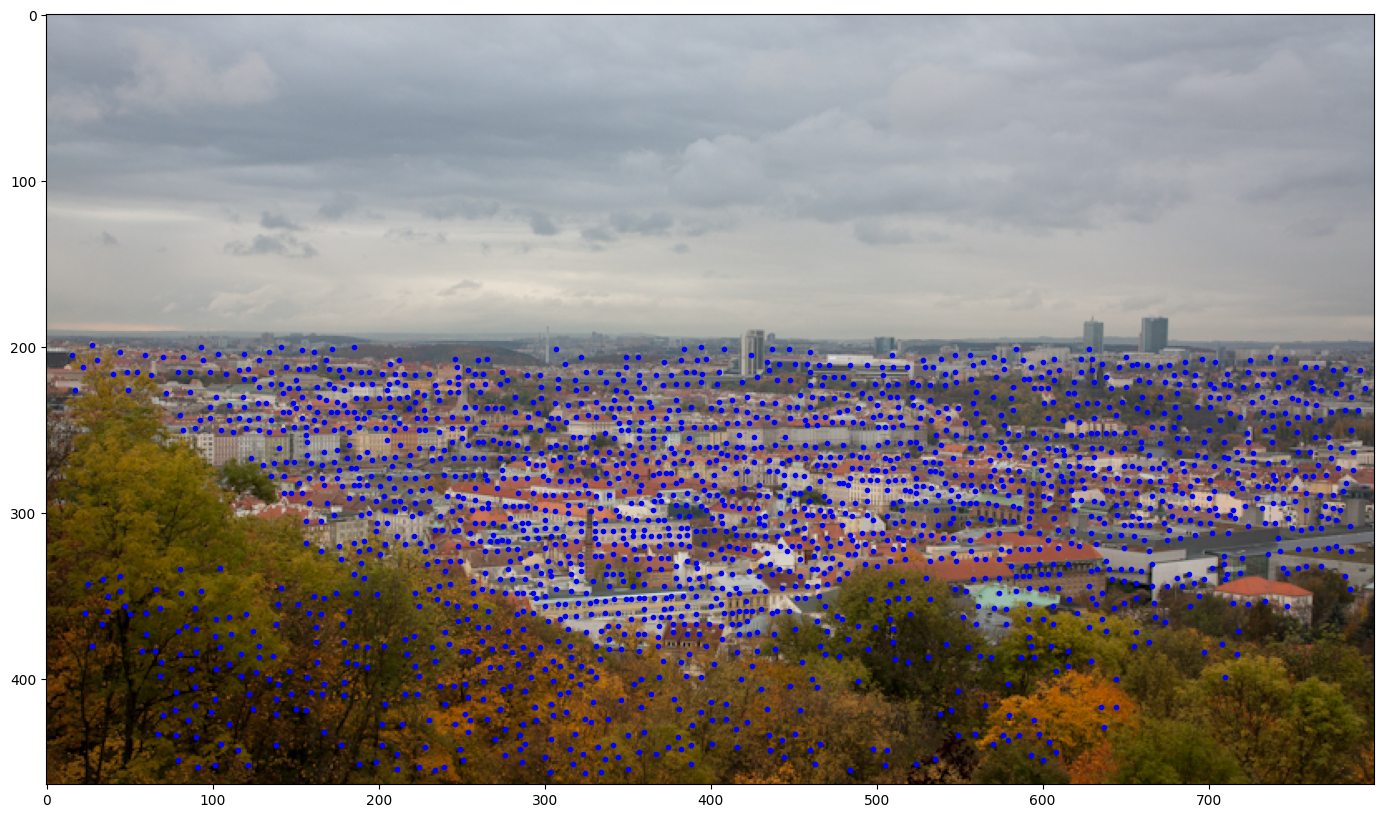

In [3]:
def visualize_DISK(img, features):
    plt.figure(figsize=(20, 10))
    plt.imshow(kornia.utils.tensor_to_image(img[0]))
    plt.scatter(features[0].x, features[0].y, color='blue', marker='.')
    plt.show()

visualize_DISK(timg,features)